In [1]:
# Model stuff
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"


import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize
import segmentation_models as sm
from sklearn.model_selection import train_test_split
import scipy.io as io


#our scripts
import model_utility
import spoketools
import preprocess_filter

#path sorting
import glob
import cv2
from pathlib import Path
import re

#math
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd



Segmentation Models: using `tf.keras` framework.


In [2]:
model = keras.models.load_model("../models/best/darkGB_Callback_shuffled_spoke_360im_300e_resnet34.h5", compile = False)
model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()], )

../data/2023_imagery/filtered/074_SPKLFMOV/W1593678128.png


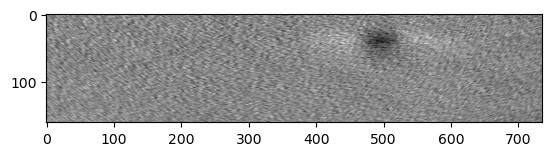

../data/2023_imagery/filtered/074_SPKLFMOV/W1593676089.png


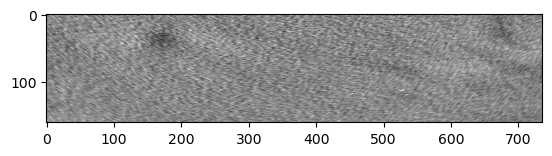

../data/2023_imagery/filtered/074_SPKLFMOV/W1593704635.png


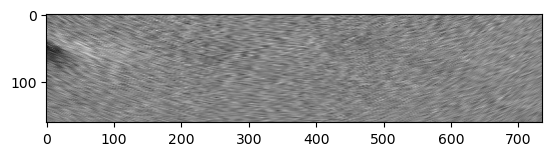

../data/2023_imagery/filtered/074_SPKLFMOV/W1593684245.png


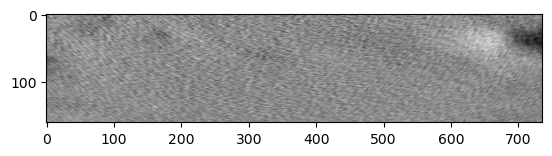

../data/2023_imagery/filtered/074_SPKLFMOV/W1593700557.png


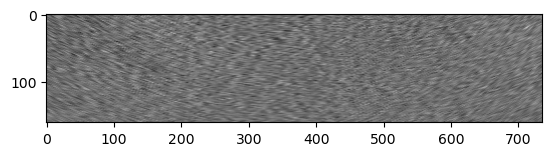

../data/2023_imagery/filtered/074_SPKLFMOV/W1593698518.png


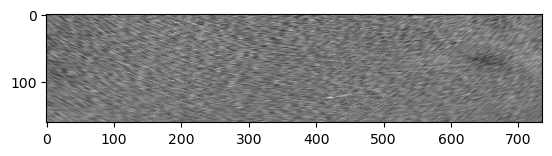

../data/2023_imagery/filtered/074_SPKLFMOV/W1593686284.png


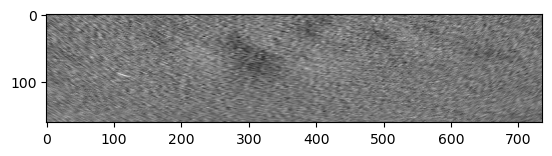

../data/2023_imagery/filtered/074_SPKLFMOV/W1593694440.png


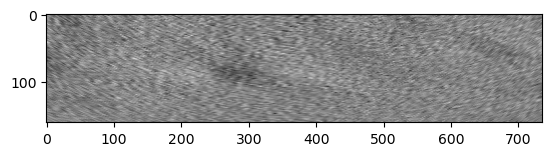

../data/2023_imagery/filtered/074_SPKLFMOV/W1593688323.png


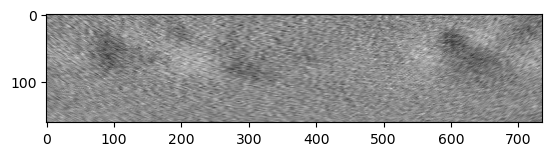

../data/2023_imagery/filtered/074_SPKLFMOV/W1593696479.png


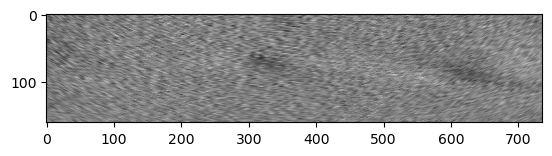

../data/2023_imagery/filtered/074_SPKLFMOV/W1593702596.png


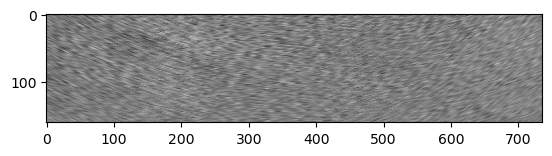

../data/2023_imagery/filtered/074_SPKLFMOV/W1593708713.png


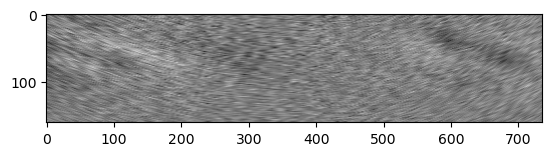

../data/2023_imagery/filtered/074_SPKLFMOV/W1593682206.png


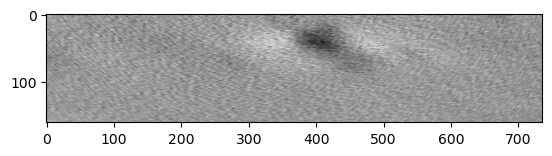

../data/2023_imagery/filtered/074_SPKLFMOV/W1593706674.png


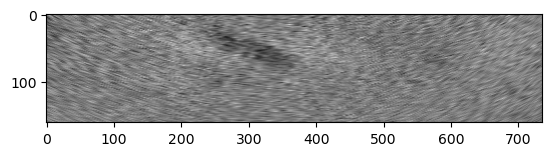

../data/2023_imagery/filtered/074_SPKLFMOV/W1593692401.png


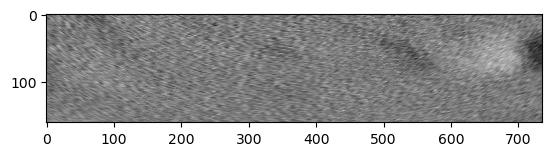

../data/2023_imagery/filtered/074_SPKLFMOV/W1593690362.png


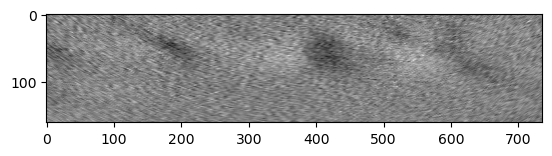

../data/2023_imagery/filtered/074_SPKLFMOV/W1593680167.png


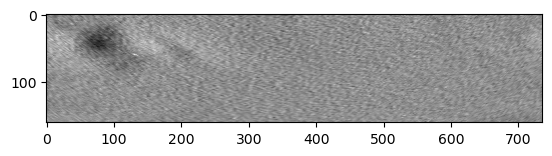

In [5]:
test_folder = glob.glob("../data/2023_imagery/filtered/074_SPKLFMOV/*.png")
# for path in test_folder:
#     # print(path)
pixel_values_list = []

for img_path in test_folder:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        print(img_path)
        plt.imshow(img, cmap = "gray")
        plt.show()
        pixel_values_list.append(img)


pixel_values_list = normalize(np.array(pixel_values_list), axis=1)
    

1/1 [==============================] - 0s 275ms/step


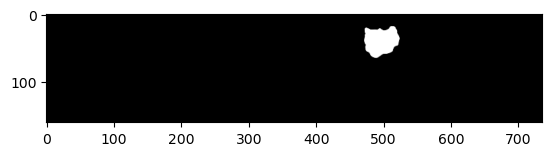

1/1 [==============================] - 0s 257ms/step


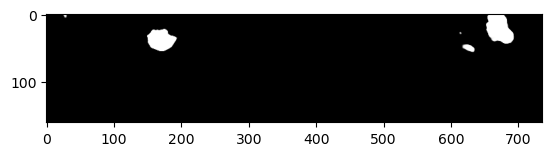

1/1 [==============================] - 0s 289ms/step


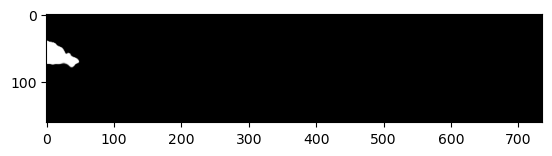

1/1 [==============================] - 0s 240ms/step


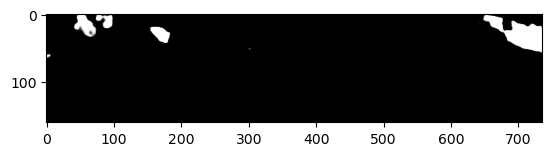

1/1 [==============================] - 0s 228ms/step


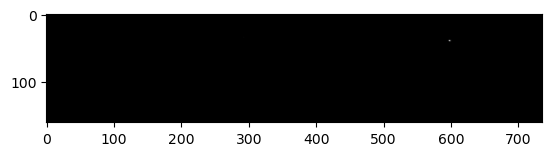

1/1 [==============================] - 0s 333ms/step


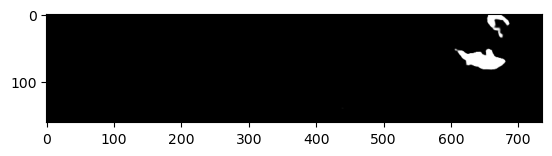

1/1 [==============================] - 0s 219ms/step


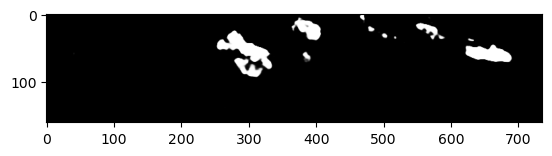

1/1 [==============================] - 0s 227ms/step


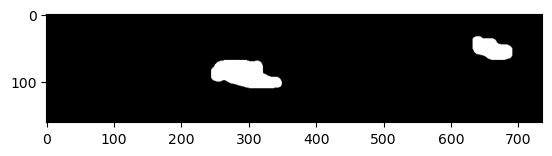

1/1 [==============================] - 0s 229ms/step


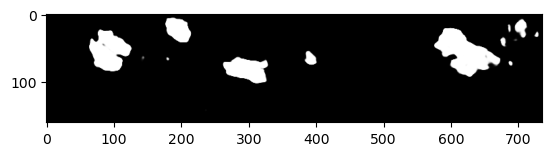

1/1 [==============================] - 0s 314ms/step


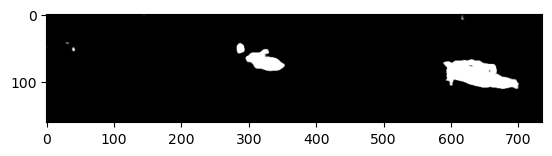

1/1 [==============================] - 0s 253ms/step


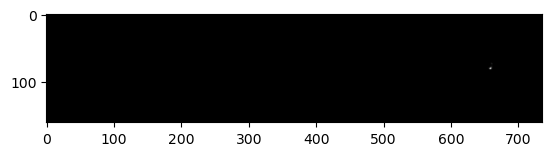

1/1 [==============================] - 0s 222ms/step


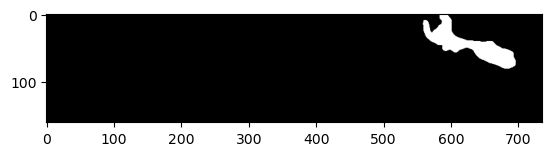

1/1 [==============================] - 0s 240ms/step


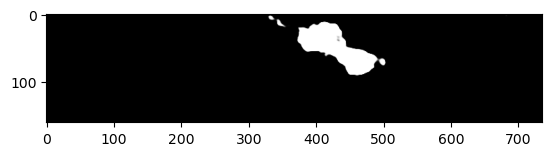

1/1 [==============================] - 0s 307ms/step


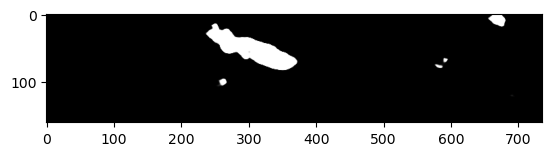

1/1 [==============================] - 0s 323ms/step


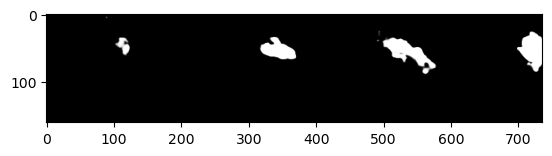

1/1 [==============================] - 0s 260ms/step


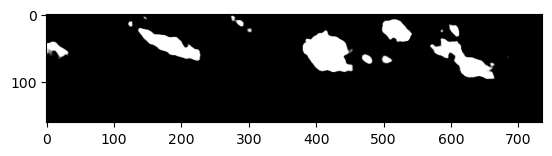

1/1 [==============================] - 0s 327ms/step


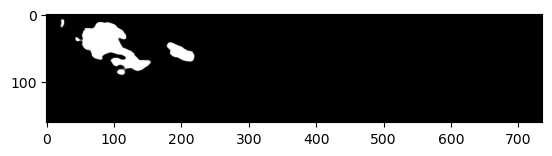

In [6]:
model_results = []

for img in  pixel_values_list:
    img = img.reshape((1, 160, 736))
    prediction = model.predict(img)
    prediction = prediction.reshape((160, 736))
    plt.imshow(prediction, cmap = "gray")
    plt.show()

    prediction[prediction > .30] = 1
    prediction[prediction <= .30] = 0
    prediction = prediction.astype(np.uint8)

    model_results.append(prediction)

model_results = np.array(model_results)

In [14]:
spokes = spoketools.color_spokes(model_results[0], 100)

In [20]:
# read in rpjb
rpjb_path = f"../data/2023_rpjb/good/074_SPKLFMOV/{test_folder[0].split('/')[-1].split('.')[0]}_1_CALIB.rpjb"

idl = io.readsav(rpjb_path)

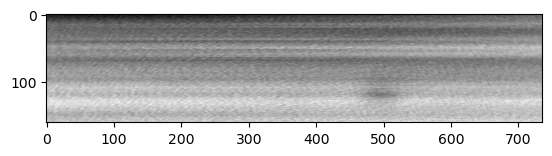

In [29]:
filename,pixel_values =  preprocess_filter.apply_filters(rpjb_path)
pixel_values = preprocess_filter.buffer_image(pixel_values, 736, 160)
plt.imshow(pixel_values, cmap = "gray")

In [30]:
m,n=pixel_values.shape
lon_array=np.linspace(idl.mnlon,idl.mxlon,n)
rad_array=np.linspace(idl.mnrad,idl.mxrad,m)

In [31]:
spoketools.spokestext(pixel_values, spokes, rad_array, lon_array, f"../data/2023_imagery/filtered/074_SPKLFMOV/{test_folder[0].split('/')[-1].split('.')[0]}.csv")

In [32]:
spokes = spoketools.color_spokes(model_results[0], 100)

rpjb_path = f"../data/2023_rpjb/good/074_SPKLFMOV/{test_folder[0].split('/')[-1].split('.')[0]}_1_CALIB.rpjb"
idl = io.readsav(rpjb_path)
filename,pixel_values =  preprocess_filter.apply_filters(rpjb_path)
pixel_values = preprocess_filter.buffer_image(pixel_values, 736, 160)

m,n=pixel_values.shape
lon_array=np.linspace(idl.mnlon,idl.mxlon,n)
rad_array=np.linspace(idl.mnrad,idl.mxrad,m)

spoketools.spokestext(pixel_values, spokes, rad_array, lon_array, f"../data/2023_imagery/filtered/074_SPKLFMOV/{test_folder[0].split('/')[-1].split('.')[0]}.csv")

In [21]:
rpjb_parent_path = "../data/2023_rpjb/good/074_SPKLFMOV/"
rpjb_path = [rpjb_parent_path+x.split("/")[-1].split(".")[0]+"_1_CALIB.rpjb" for x in test_folder]


(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593678128_1_CALIB.rpjb


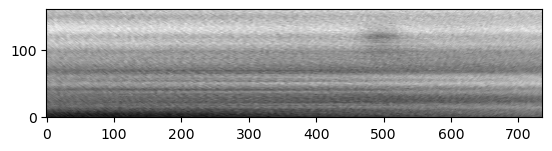

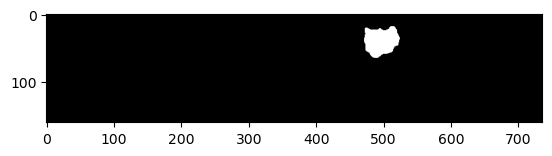

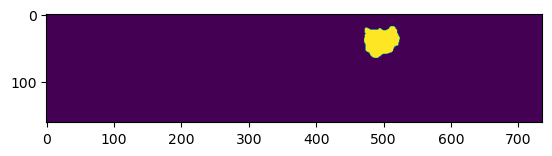

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593676089_1_CALIB.rpjb


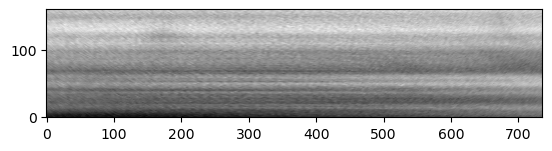

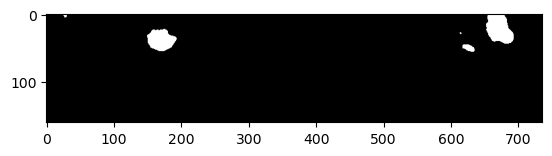

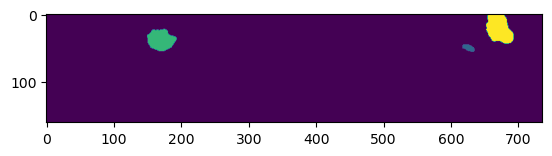

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593704635_1_CALIB.rpjb


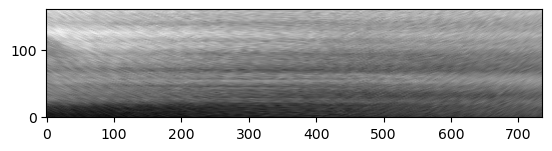

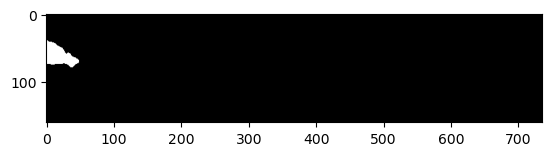

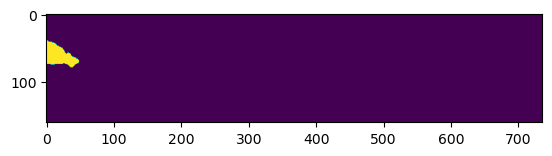

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593684245_1_CALIB.rpjb


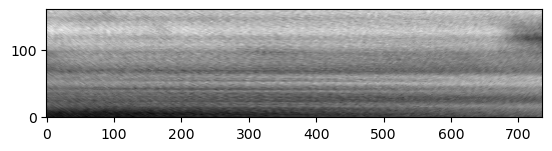

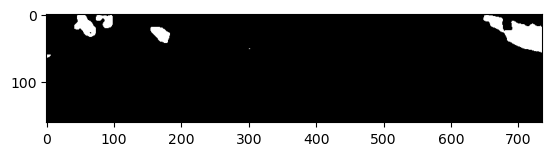

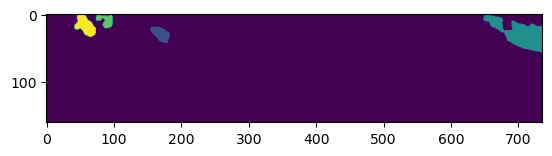

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593700557_1_CALIB.rpjb


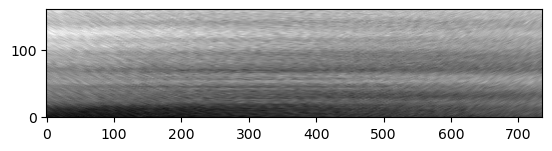

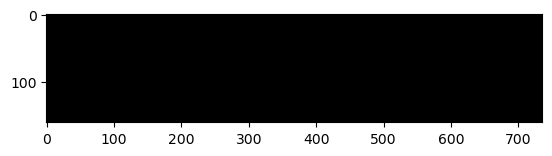

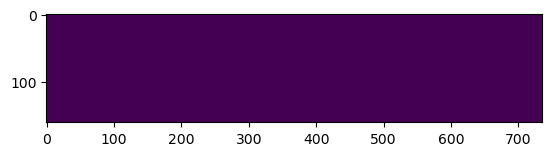

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593698518_1_CALIB.rpjb


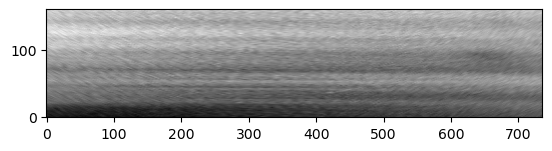

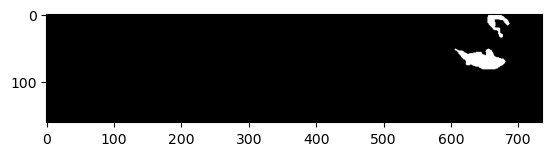

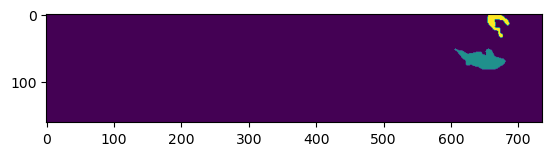

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593686284_1_CALIB.rpjb


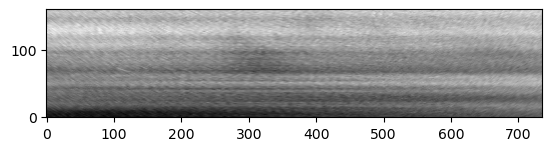

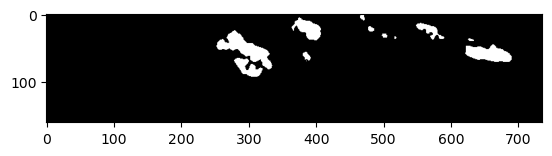

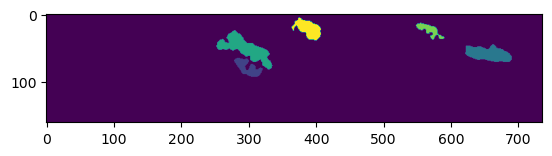

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593694440_1_CALIB.rpjb


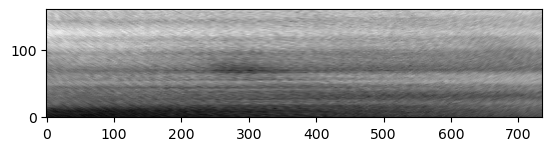

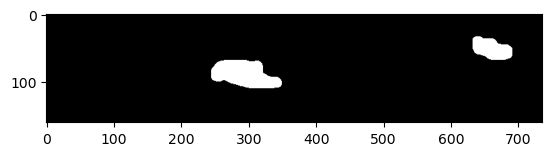

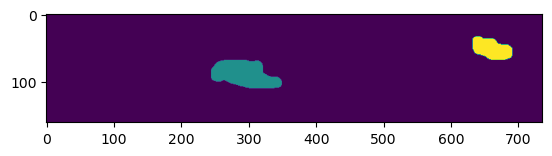

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593688323_1_CALIB.rpjb


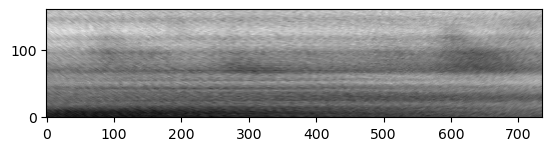

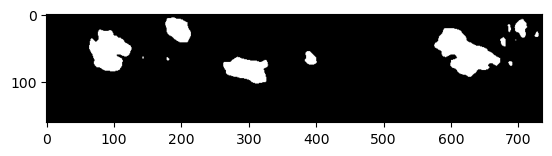

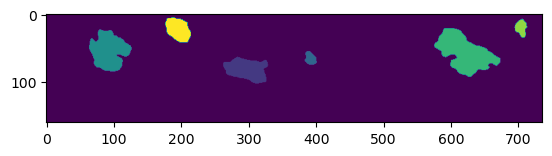

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593696479_1_CALIB.rpjb


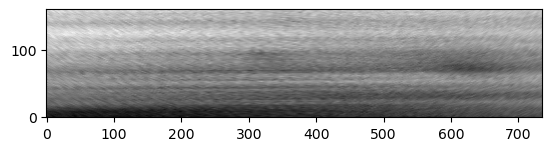

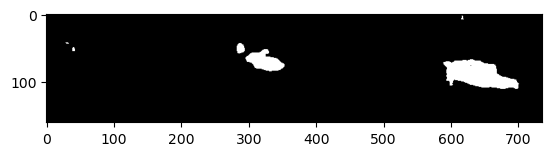

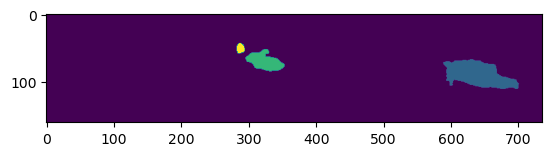

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593702596_1_CALIB.rpjb


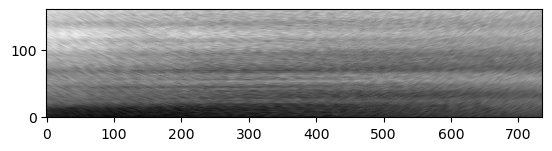

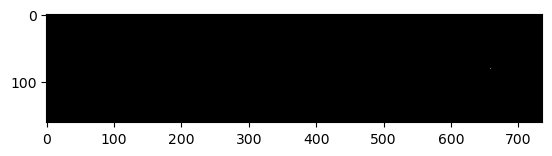

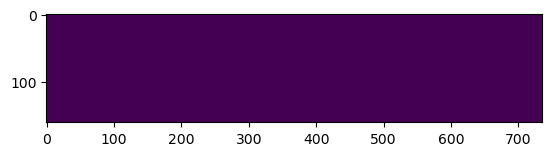

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593708713_1_CALIB.rpjb


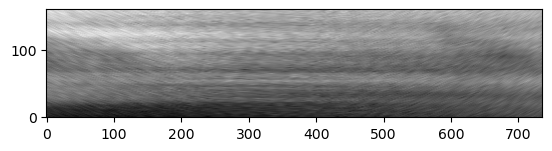

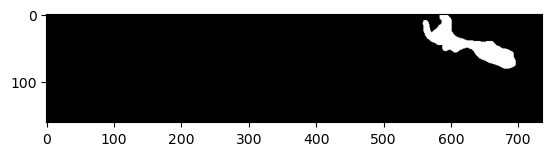

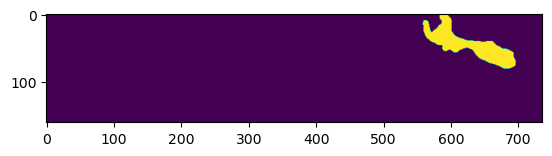

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593682206_1_CALIB.rpjb


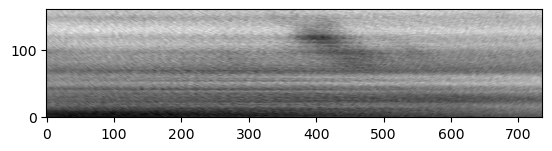

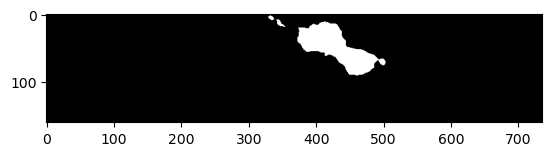

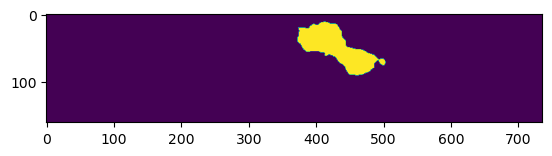

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593706674_1_CALIB.rpjb


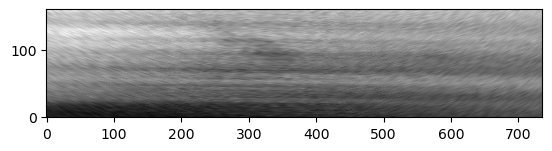

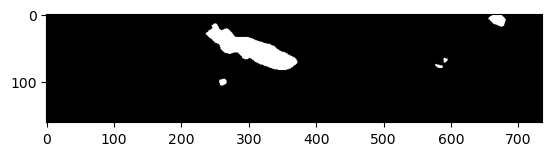

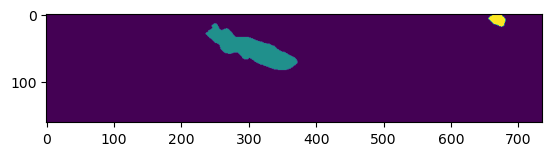

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593692401_1_CALIB.rpjb


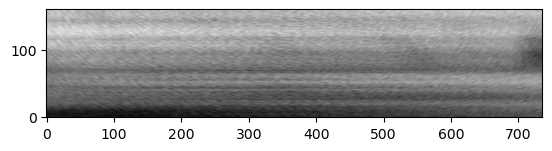

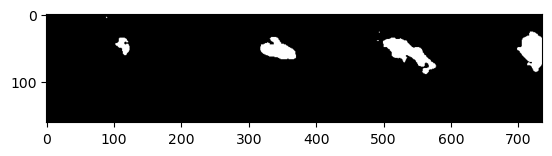

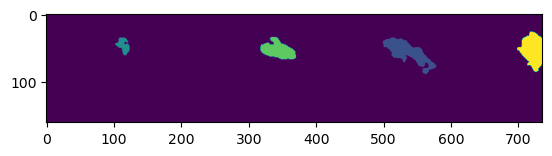

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593690362_1_CALIB.rpjb


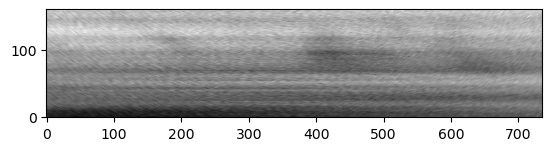

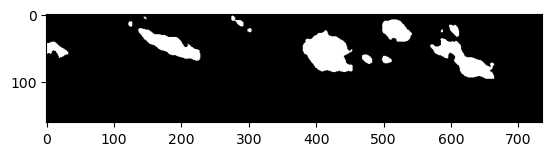

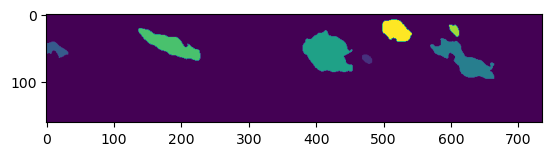

(160, 736)
../data/2023_rpjb/good/074_SPKLFMOV/W1593680167_1_CALIB.rpjb


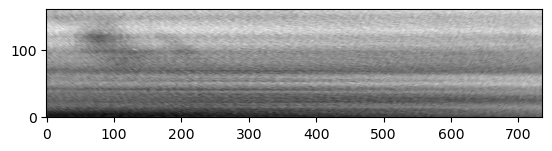

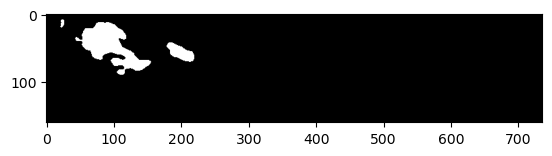

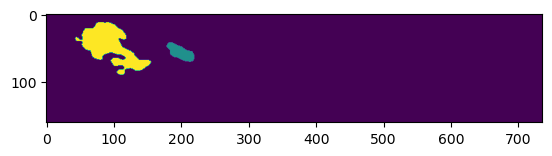

In [22]:
for model_result,rpjb_path in zip(model_results, rpjb_path):
    print(model_result.shape)
    print(rpjb_path)

    spokes = spoketools.color_spokes(model_result, 100)

    idl = io.readsav(rpjb_path)
    filename,pixel_values =  preprocess_filter.apply_filters(rpjb_path)
    # pixel_values = preprocess_filter.remove_cosmic_rays(pixel_values)
    # pixel_values = preprocess_filter.apply_lucy_median(pixel_values)
    # pixel_values = spoketools.fft2lpf(pixel_values, 0, 3)
    pixel_values = preprocess_filter.buffer_image(pixel_values, 736, 160)
    plt.imshow(pixel_values, cmap = "gray", origin = "lower")
    plt.show()

    

    m,n=pixel_values.shape
    lon_array=np.linspace(idl.mnlon,idl.mxlon,n)
    rad_array=np.linspace(idl.mnrad,idl.mxrad,m)
    # plt.imsave(fname=f"../data/2023_imagery/filtered/074_SPKLFMOV/{rpjb_path.split('/')[-1].split('.')[0]}_ML_model_result.png", arr=model_result, cmap='gray', format='png')
    plt.imshow(model_result, cmap = "gray")
    plt.show()
    plt.imshow(spokes)
    plt.show()
    # plt.imsave(fname=f"../data/2023_imagery/filtered/074_SPKLFMOV/{rpjb_path.split('/')[-1].split('.')[0]}_ML_color_result.png", arr=spokes, format='png')
    spoketools.spokestext(pixel_values, spokes, rad_array, lon_array, f"../data/2023_imagery/filtered/074_SPKLFMOV/{rpjb_path.split('/')[-1].split('.')[0]}_ML.txt")